<a href="https://colab.research.google.com/github/quarcs-lab/project2025s/blob/master/notebooks/c02_regional_convergence_sc.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /></a>

This notebook examines absolute $\beta$-convergence in nighttime luminosity across 520 Indian districts (1996--2010). We regress per capita luminosity growth on initial luminosity levels and visualize the relationship in an annotated scatterplot. This analysis corresponds to the first set of results discussed in the main manuscript.

## Setup

In [1]:
# Setup
library(haven)
library(ggplot2)
library(ggstatsplot)
library(cowplot)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



## Data

We use district-level radiance-calibrated nighttime lights data from the DMSP-OLS satellites, covering 520 districts.

In [2]:
# Load dataset from GitHub
url <- "https://raw.githubusercontent.com/quarcs-lab/project2025s/master/data/india520.dta"
temp <- tempfile(fileext = ".dta")
download.file(url, temp, mode = "wb")
data <- read_dta(temp)

## Convergence regression

A negative slope on initial luminosity indicates $\beta$-convergence: districts with lower initial luminosity grew faster over the period.

In [3]:
# Basic OLS Regression
model1 <- lm(light_growth96_10rcr_cap ~ log_light96_rcr_cap, data = data)
summary(model1)


Call:
lm(formula = light_growth96_10rcr_cap ~ log_light96_rcr_cap, 
    data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.110924 -0.022972  0.001766  0.020301  0.198850 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.072274   0.007382   -9.79   <2e-16 ***
log_light96_rcr_cap -0.019881   0.001494  -13.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03722 on 518 degrees of freedom
Multiple R-squared:  0.2547,	Adjusted R-squared:  0.2533 
F-statistic:   177 on 1 and 518 DF,  p-value: < 2.2e-16


In [4]:
# Compute regression model for scatterplot annotation
model <- lm(light_growth96_10rcr_cap ~ log_light96_rcr_cap, data = data)
slope <- round(coef(model)[2], 3)
rsq   <- round(summary(model)$r.squared, 3)

## Convergence scatterplot

The scatterplot below visualizes the convergence relationship. Outlier districts are labeled to highlight cases that deviate notably from the overall trend---either bright districts that declined or dim districts that grew unusually fast.

`stat_xsidebin()` using `bins = 30`. Pick better value `binwidth`.


`stat_ysidebin()` using `bins = 30`. Pick better value `binwidth`.


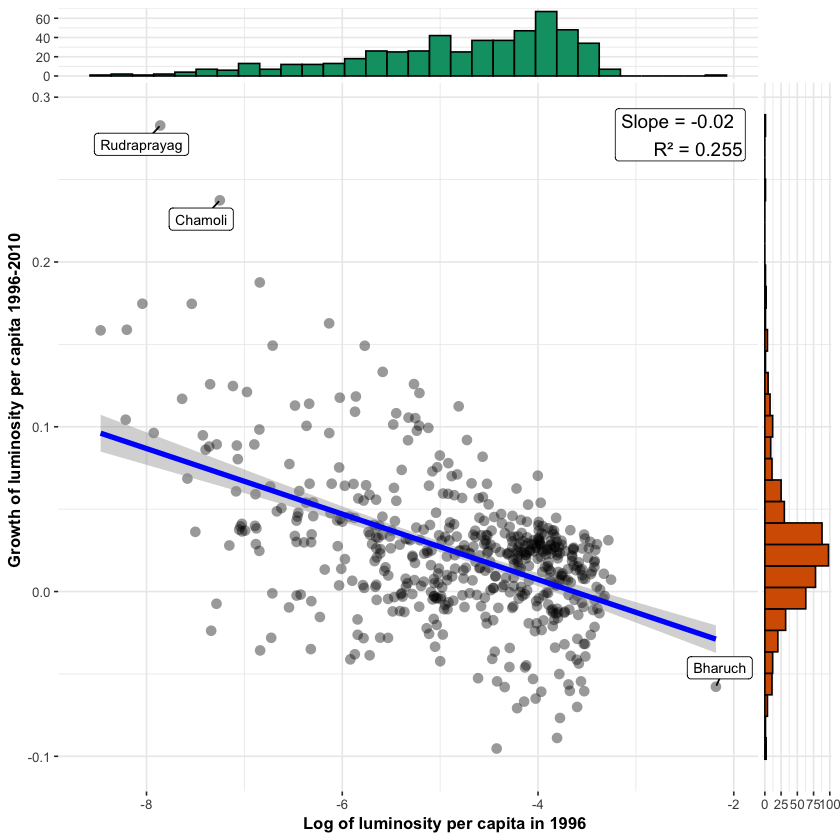

In [5]:
#| label: fig-convergence
#| fig-cap: "Regional luminosity convergence across districts in India <br> Note: See Regional convergence notebook for source code. <br> Source: Data from Chanda and Kabiraj (2000)."
# Annotated scatterplot
p1 <- ggscatterstats(
  data = data,
  x = log_light96_rcr_cap,
  y = light_growth96_10rcr_cap,
  label.var = district,
  label.expression = (log_light96_rcr_cap > -3 & light_growth96_10rcr_cap < 0) | (log_light96_rcr_cap <-7 & light_growth96_10rcr_cap > 0.2),
  results.subtitle = FALSE,
  xlab = "Log of luminosity per capita in 1996",
  ylab = "Growth of luminosity per capita 1996-2010"
) +
annotate("label",
           x = Inf,
           y = Inf,
           label = paste("Slope =", slope, "\nR\u00b2 =", rsq),
           hjust = 1.1,
           vjust = 1.5,
           size = 4)
p1